In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing..

In [27]:
data = pd.read_csv('/content/train.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,946.859985,951.390015,935.599976,941.479980,941.479980,1457400
1,2017-09-06,943.869995,944.500000,932.679993,942.020020,942.020020,1391500
2,2017-09-07,944.250000,950.500000,937.530029,949.890015,949.890015,1116600
3,2017-09-08,949.700012,950.700012,940.010010,941.409973,941.409973,999900
4,2017-09-11,947.200012,952.679993,941.000000,943.289978,943.289978,1337400


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [29]:
data['Date'].max()

'2020-09-02'

In [30]:
data['Date'].min()

'2017-09-05'

In [31]:
training_set = data.iloc[:,1:2].values                         # to get "Open" column to training purpose...

In [32]:
training_set.shape

(755, 1)

In [33]:
# feature scaling... there are two ways of scaling, standardization and normalization...
# here we are using Normalization, in RNN generally, normalization is used

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [34]:
training_set_scaled.shape

(755, 1)

In [35]:
# creating a data structure with 60 timesteps and 1 output..

x_train = []
y_train = []
for i in range(60,755):
  x_train.append(training_set_scaled[i-60:i, 0])             # 0 is the column index..
  y_train.append(training_set_scaled[i,0])

# converting x_train and y_train into numpy array..
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
x_train.shape

(695, 60)

In [37]:
y_train.shape

(695,)

In [38]:
# Reshaping the dataset..

x_train = x_train.reshape(695,60,1)        # 695 is batch size total no. of observations, 60 is timestep i.e. total columns, 1 is a predictor i.e. one Google stock price


In [39]:
x_train.shape

(695, 60, 1)

# Building LSTM

In [40]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
model = Sequential()

In [41]:
# first LSTM Layer...
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))

# Dropout layer..
model.add(Dropout(0.2))

# Second LSTM layer..
model.add(LSTM(units=60, activation='relu', return_sequences=True))           # use return_sequences = True when we are going to add next LSTM layer..
model.add(Dropout(0.2))

# Third LSTM layer...
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Last LSTM layer... 
model.add(LSTM(units=120, activation='relu'))                                 # here we are not adding new LSTM layer, so return_sequences=False
model.add(Dropout(0.2))

# Output layer...
model.add(Dense(units=1))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model..

In [44]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
22/22 [==============================] - 9s 177ms/step - loss: 0.0638
Epoch 2/100
22/22 [==============================] - 4s 175ms/step - loss: 0.0183
Epoch 3/100
22/22 [==============================] - 4s 172ms/step - loss: 0.0114
Epoch 4/100
22/22 [==============================] - 4s 173ms/step - loss: 0.0110
Epoch 5/100
22/22 [==============================] - 4s 175ms/step - loss: 0.0108
Epoch 6/100
22/22 [==============================] - 4s 176ms/step - loss: 0.0097
Epoch 7/100
22/22 [==============================] - 4s 173ms/step - loss: 0.0092
Epoch 8/100
22/22 [==============================] - 4s 174ms/step - loss: 0.0088
Epoch 9/100
22/22 [==============================] - 4s 173ms/step - loss: 0.0086
Epoch 10/100
22/22 [==============================] - 4s 176ms/step - loss: 0.0072
Epoch 11/100
22/22 [==============================] - 4s 172ms/step - loss: 0.0081
Epoch 12/100
22/22 [==============================] - 4s 172ms/step - loss: 0.0077
Epoch 13/100


# Prediction

In [51]:
test_data = pd.read_csv('/content/test.csv')

In [52]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-03,2345.729980,2357.020020,2329.520020,2347.580078,2347.580078,934800
1,2021-06-04,2369.270020,2399.030029,2362.409912,2393.570068,2393.570068,1222900
2,2021-06-07,2389.439941,2404.510010,2381.000000,2402.300049,2402.300049,1206000
3,2021-06-08,2412.010010,2419.520020,2394.780029,2398.439941,2398.439941,1212000
4,2021-06-09,2411.429932,2412.879883,2396.899902,2407.939941,2407.939941,897100


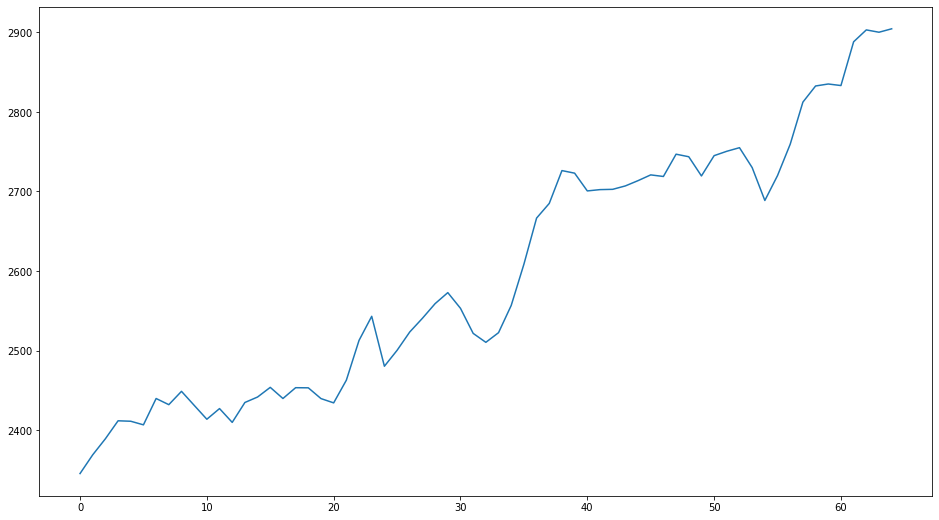

In [53]:
plt.figure(figsize=(16,9))
test_data['Open'].plot()
plt.show()

In [54]:
test_data.shape

(65, 7)

In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       65 non-null     object 
 1   Open       65 non-null     float64
 2   High       65 non-null     float64
 3   Low        65 non-null     float64
 4   Close      65 non-null     float64
 5   Adj Close  65 non-null     float64
 6   Volume     65 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.7+ KB


In [56]:
real_price = test_data.iloc[:,1:2].values

In [57]:
real_price.shape

(65, 1)

In [59]:
# Getting predicted stock prices..
dataset_total = pd.concat((data['Open'], test_data['Open']))

# Stock prices of previous 60 days for each day of test_data
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,125):                  # we have to select stock prices of previous 60 days for each prediction, hence lower bound is 60 and 60+65=125..60 of previous stock prices and 65 of test_data
  x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_prices = model.predict(x_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

In [60]:
print(predicted_stock_prices[3]), print(real_price[3])

[2029.5304]
[2412.01001]


(None, None)

# Visualization

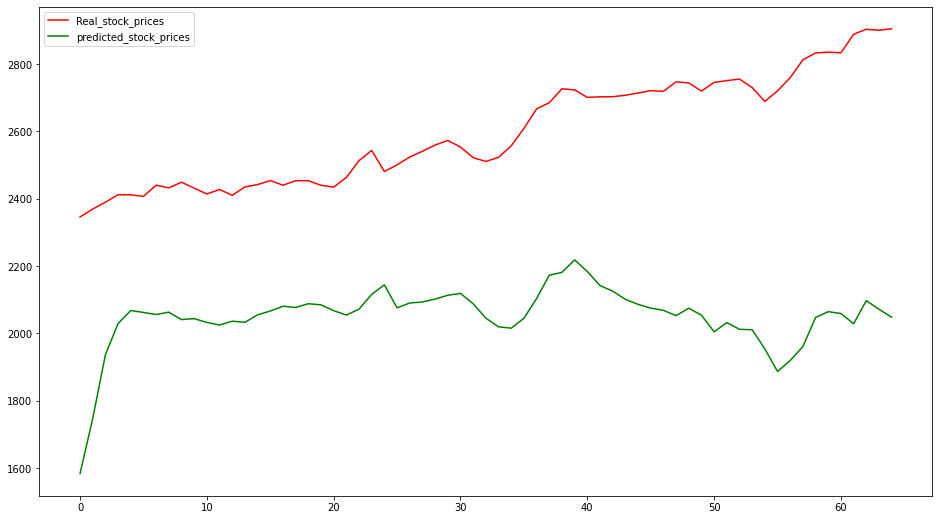

In [61]:
plt.figure(figsize=(16,9))
plt.plot(real_price, color='red', label='Real_stock_prices')
plt.plot(predicted_stock_prices, color='green', label='predicted_stock_prices')
plt.legend()
plt.show()